In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
# Loading the dataset as dataframe
tags = pd.read_csv('./book_tags.csv')
books = pd.read_csv('./books.csv')
ratings = pd.read_csv('./ratings.csv')

In [59]:
print(tags.columns)
print(books.columns)
print(ratings.columns)

Index(['goodreads_book_id', 'tag_id', 'count'], dtype='object')
Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url', 'NonEnglish'],
      dtype='object')
Index(['user_id', 'book_id', 'rating'], dtype='object')


# Question 1
How many books do not have an original title [books.csv]?

In [60]:
# Books without an original title
books_without_original_title = books['original_title'].isnull().sum()

# Get the number of the book
print(f'Number of books without an original title: {books_without_original_title}')

Number of books without an original title: 36


# Question 2
How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

In [61]:
# Remove rows with null values in the 'original_title'
books = books.dropna(subset=['original_title'])

# Get the number of unique books based on 'book_id'
count_unique_books = books['book_id'].nunique()
print(f'Number of unique books after removing null values in original_title : {count_unique_books}')

Number of unique books after removing null values in original_title : 363


In [62]:
# Removing coressponding records
tags = tags[tags['goodreads_book_id'].isin(books['goodreads_book_id'])]
ratings = ratings[ratings['book_id'].isin(books['book_id'])]

# Question 3

How many unique users are present in the dataset [ratings.csv] ?

In [63]:
# Get the number of unique user IDs based on 'user_id'
unique_users = ratings['user_id'].nunique()
print(f'Number of unique users: {unique_users}')

Number of unique users: 40573


# Question 4
How many unique tags are there in the dataset [book_tags.csv] ?

In [64]:
# Get the number of unique tags based on 'tag_id'
unique_tags = tags['tag_id'].nunique()
print(f'Number of unique tags: {unique_tags}')

Number of unique tags: 3438


# Question 5
Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.

In [65]:
tag_counts = tags['tag_id'].value_counts()

# Finding the tag_id with the highest count
most_freq_tag = tag_counts.idxmax()

# In case of ties, get the tag_id with the least numerical value
if tag_counts.duplicated().any():
    most_freq_tag = tag_counts[tag_counts == tag_counts.max()].index.min()

print(f'Most frequently used tag_id: {most_freq_tag}')

Most frequently used tag_id: 4600


# Question 6
Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] . 

In [66]:
# Merge datasets based on the common identifier 'book_id'
merge_df = pd.merge(tags, books, on='goodreads_book_id')

# Group by book title and calculate the tag counts for each book
tagcounts = merge_df.groupby('title')['tag_id'].count()

# Find the book with the highest tag count
book_high_tag_count = tagcounts.idxmax()

print(f'Book with the most number of tag counts: {book_high_tag_count}')

Book with the most number of tag counts: 'Tis (Frank McCourt, #2)


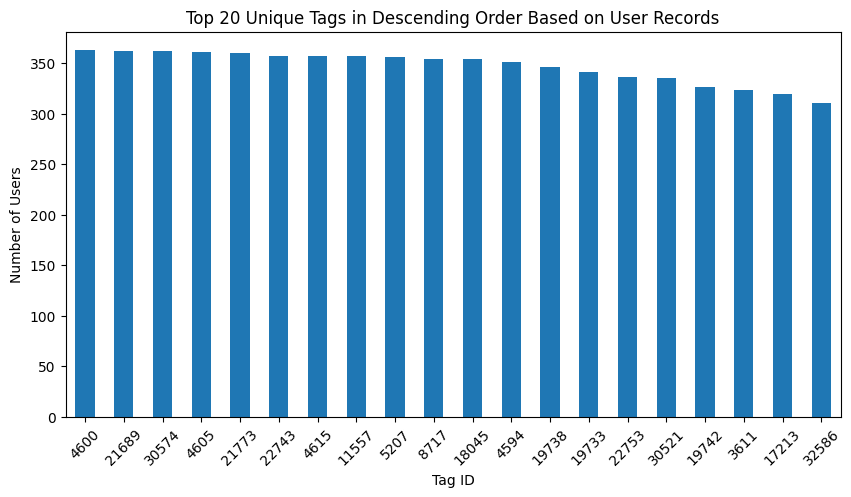

In [67]:
# Group by tag_id and count the number of unique users for each tag
tag_user_counts = tags.groupby('tag_id')['goodreads_book_id'].nunique()

# Get the top 20 tags based on user records by using head()
top_20_tags = tag_user_counts.sort_values(ascending=False).head(20)

# Plotting the bar chart using matplotlib
plt.figure(figsize=(10, 5))
top_20_tags.plot(kind='bar')
plt.title('Top 20 Unique Tags in Descending Order Based on User Records')
plt.xlabel('Tag ID')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()